# Ensemble Classification

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

In [2]:
'''
def device():
    if torch.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")
'''

def device():
    return torch.device("cpu")

In [3]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
DOT_SIZE = 4
TEST_RATIO = 0.2
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

torch.manual_seed(N_SEED)

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [4]:
def show_corr(features, target):
    plt.figure(figsize=(19, 15))
    features.corrwith(target).plot.bar(color="orange", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    plt.figure(figsize=(20, 15))
    sns.heatmap(
        corr,
        annot=True,
        cmap=COLOR_MAP,
        fmt=".2f",
        vmax=100,
        vmin=-100,
    )
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, y):
    for col in x.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figwidth(12)
        fig.suptitle("X: {i}".format(i=col), fontdict={"color": "darkblue"})
        ax1.scatter(x[col], y, color="red", s=DOT_SIZE,)
        ax1.spines["bottom"].set_color(T_COLOR)
        ax1.spines["top"].set_color(None)
        ax1.spines["left"].set_color(T_COLOR)
        ax1.spines["right"].set_color(None)
        ax1.tick_params(axis="x", colors=T_COLOR)
        ax1.tick_params(axis="y", colors=T_COLOR)
        ax2.hist(x[col], color="orange")
        ax2.spines["bottom"].set_color(T_COLOR)
        ax2.spines["top"].set_color(None)
        ax2.spines["left"].set_color(T_COLOR)
        ax2.spines["right"].set_color(None)
        ax2.tick_params(axis="x", colors=T_COLOR)
        ax2.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="orange", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1], "--", color="red")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1"),
        vmax=100,
        vmin=0,
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();


def plot_Xy2(x, target, x2=None, target2=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x2 is not None and target2 is not None:
        plt.plot(x2, target2, '-', color="orange", linewidth=2)
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

## Quality  Check Dataset

In [5]:
dataset = pd.read_csv("../data/creditcard.csv")

### EDA

In [6]:
dataset[:TOP_K]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
X_df = dataset.drop(columns=["Class", "Time"], axis=1)
y_df = dataset["Class"]
X = np.array(X_df)
y = np.array(y_df)

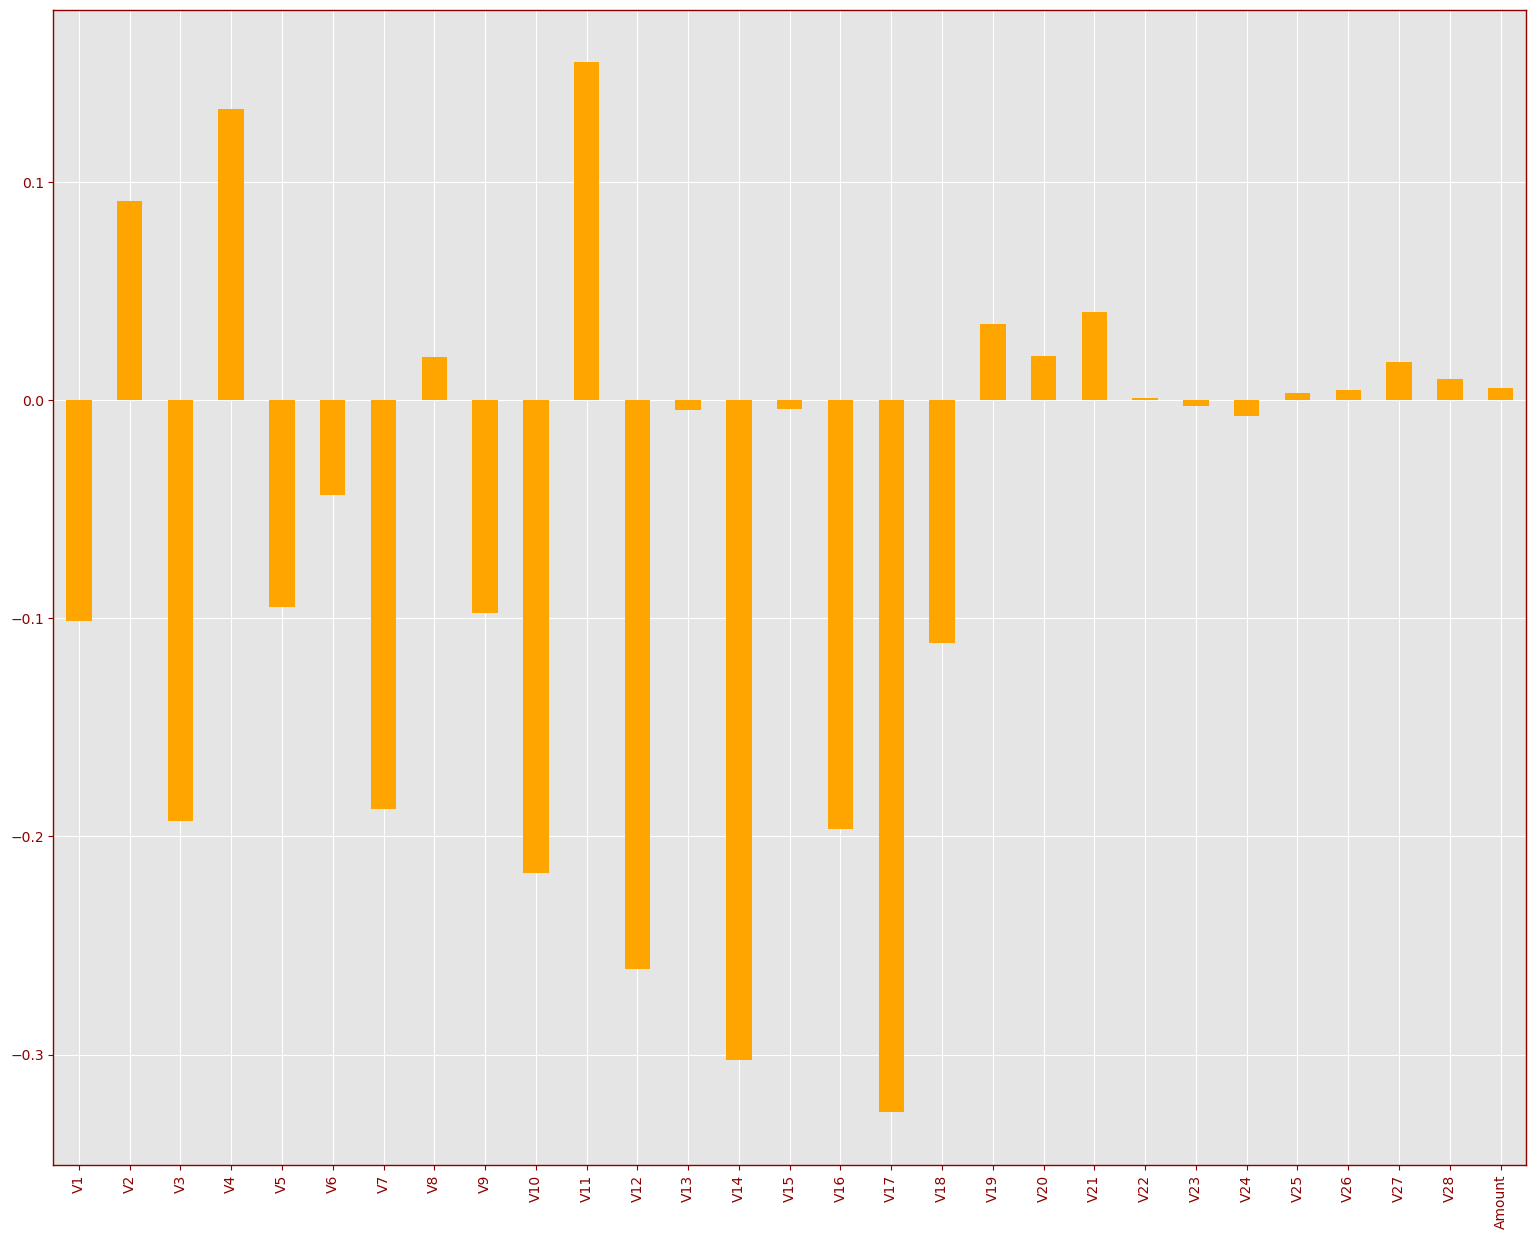

In [10]:
show_corr(X_df, y_df)

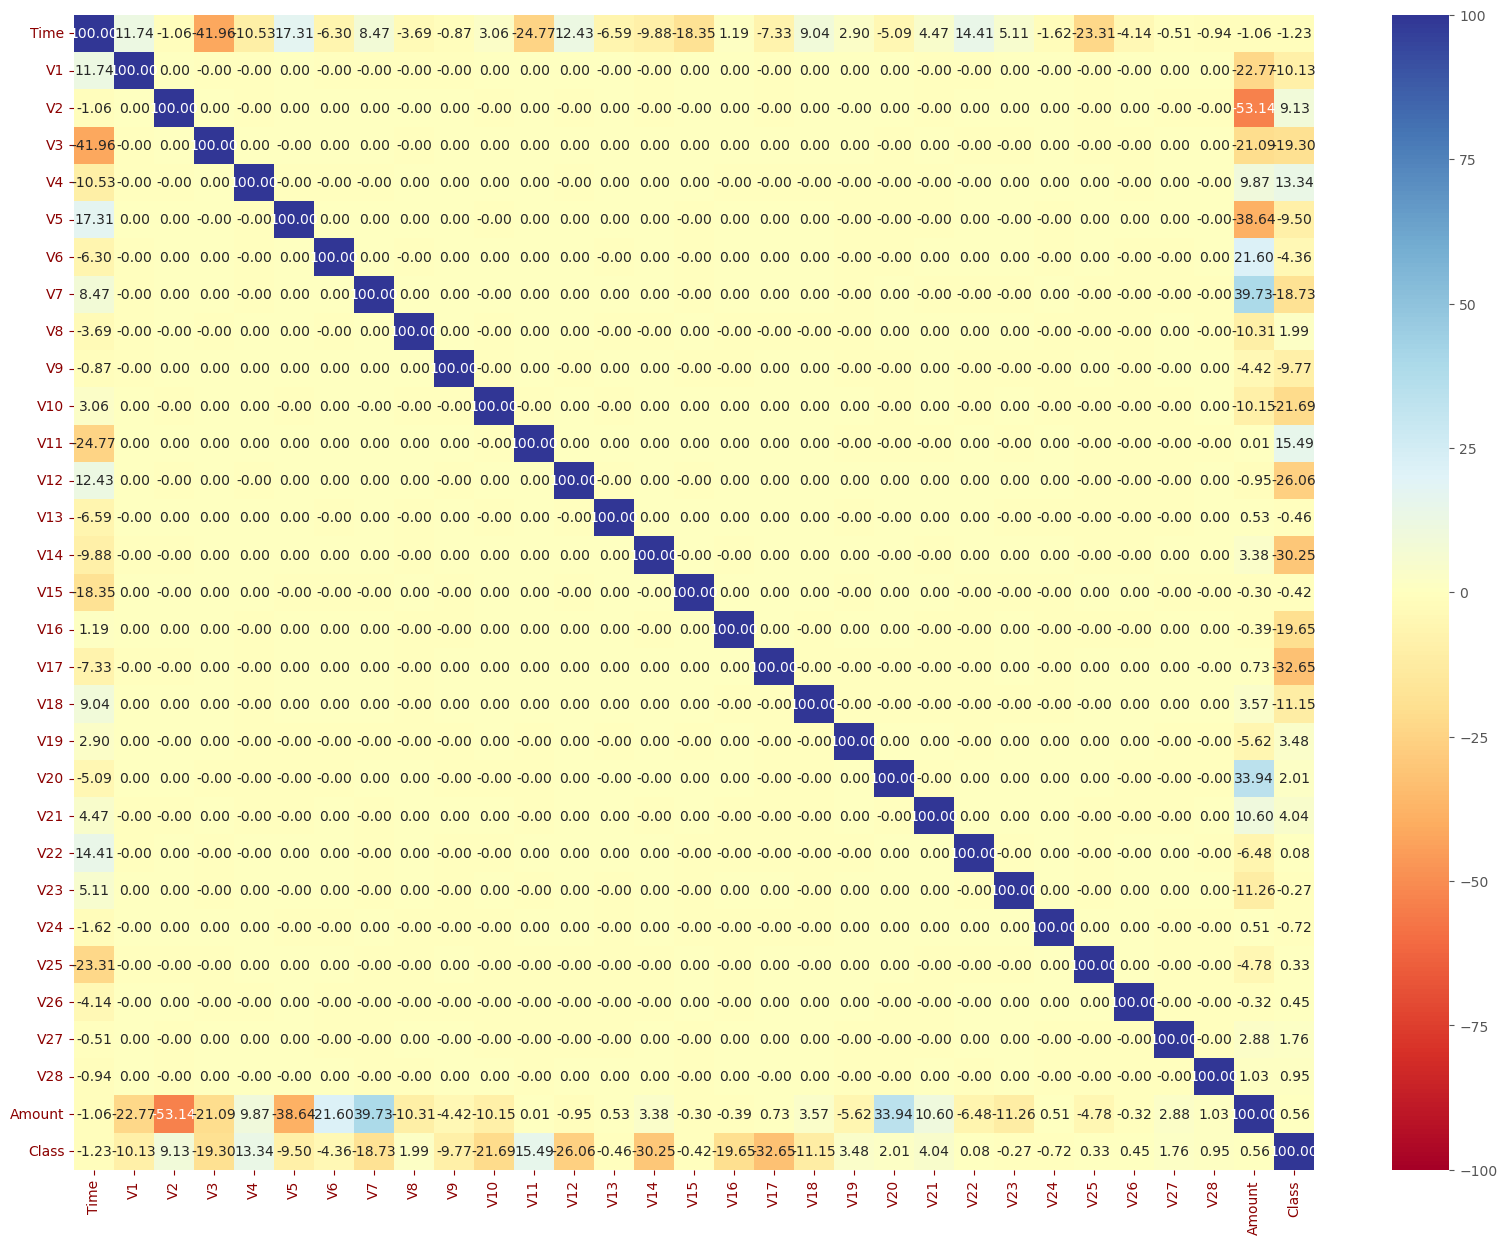

In [11]:
show_corr_heatmap(dataset)

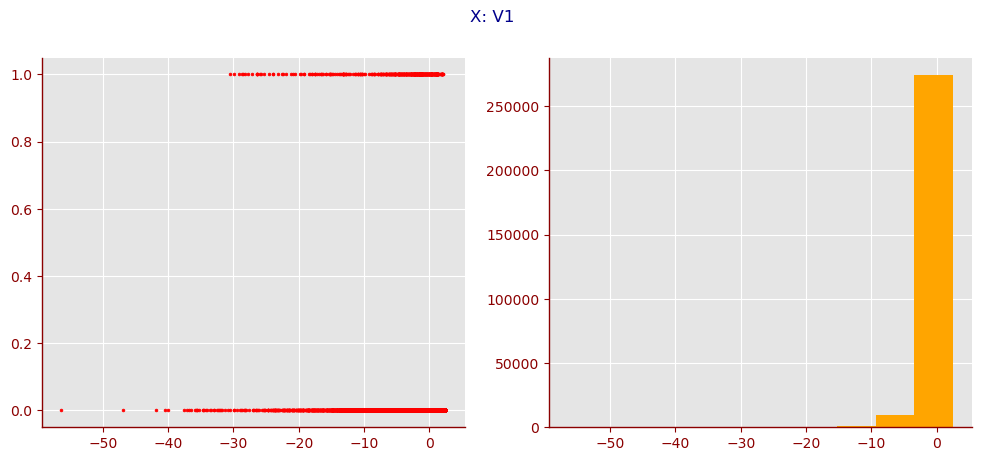

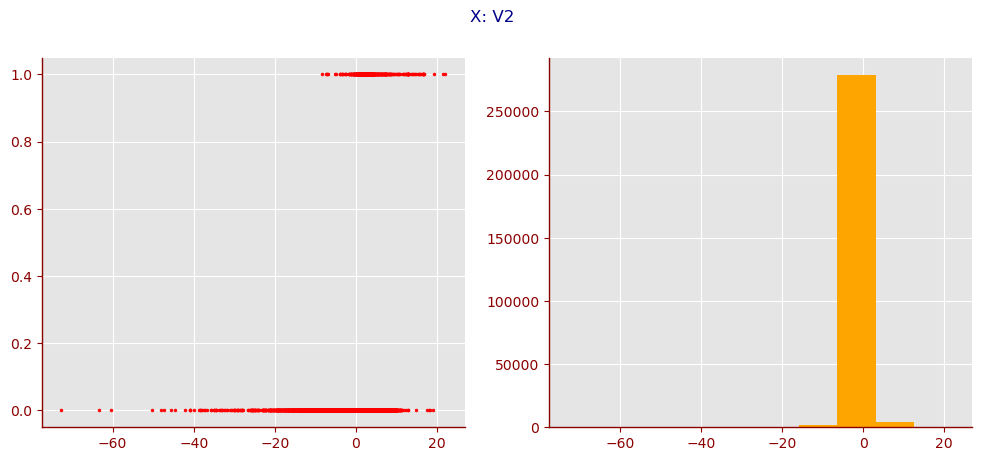

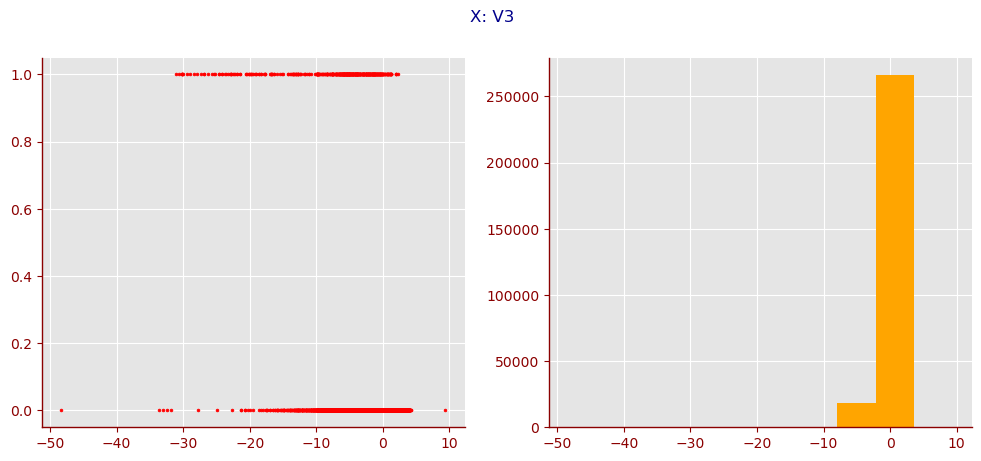

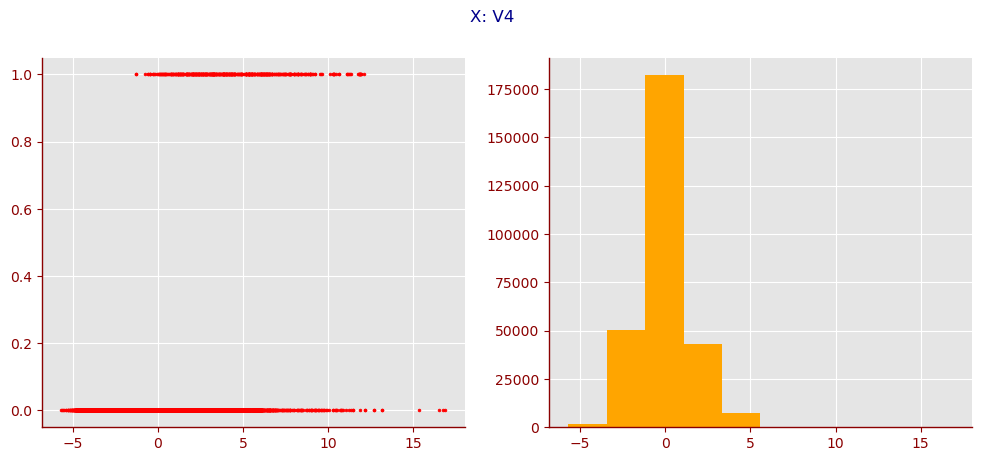

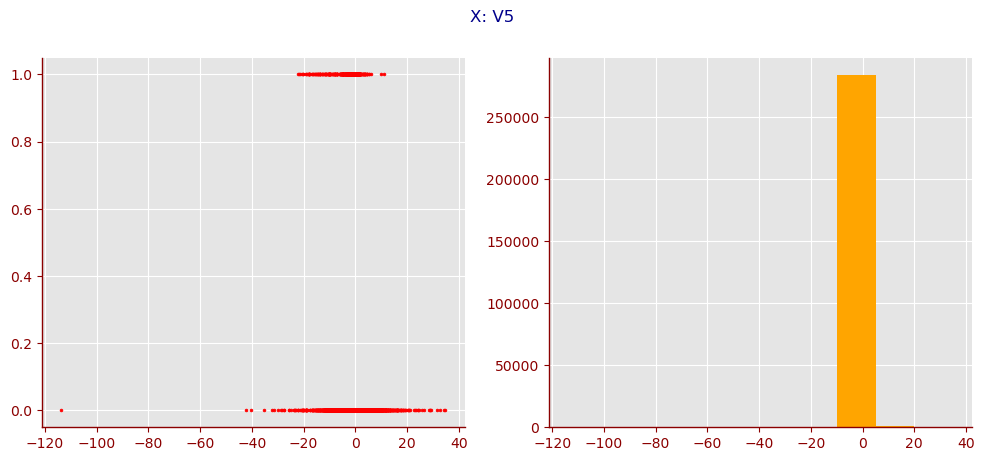

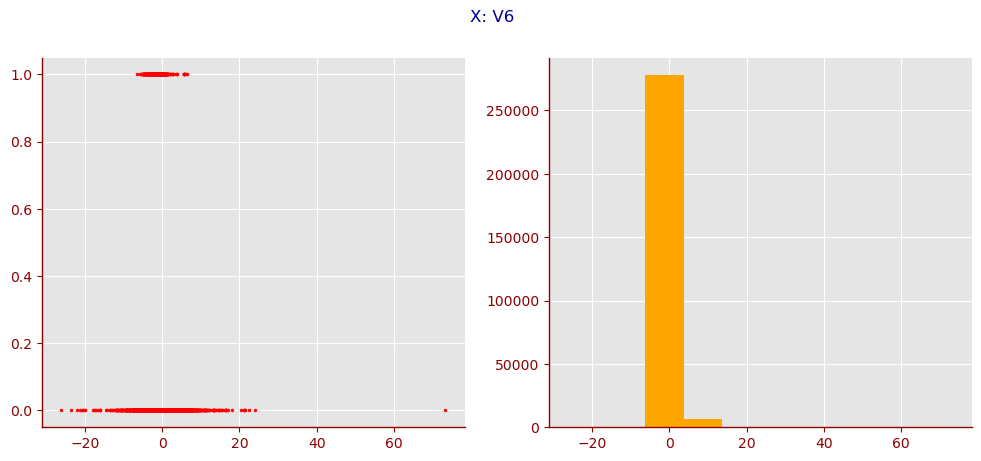

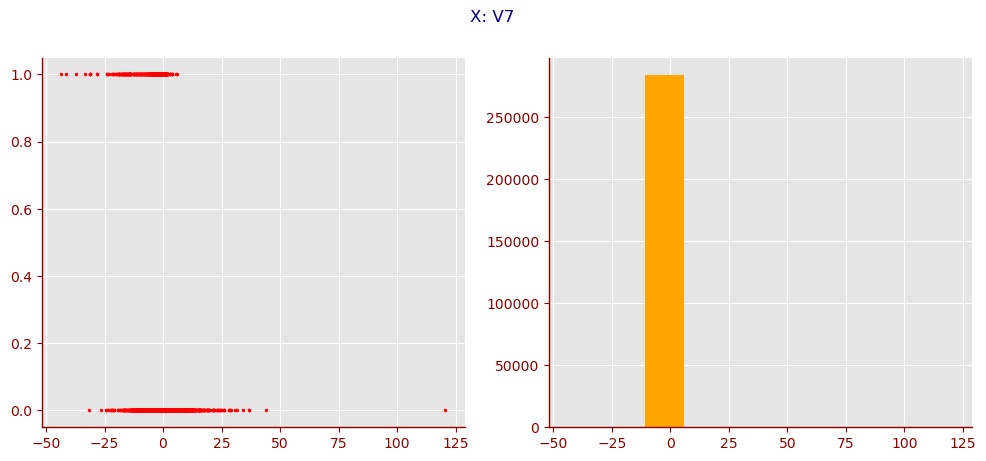

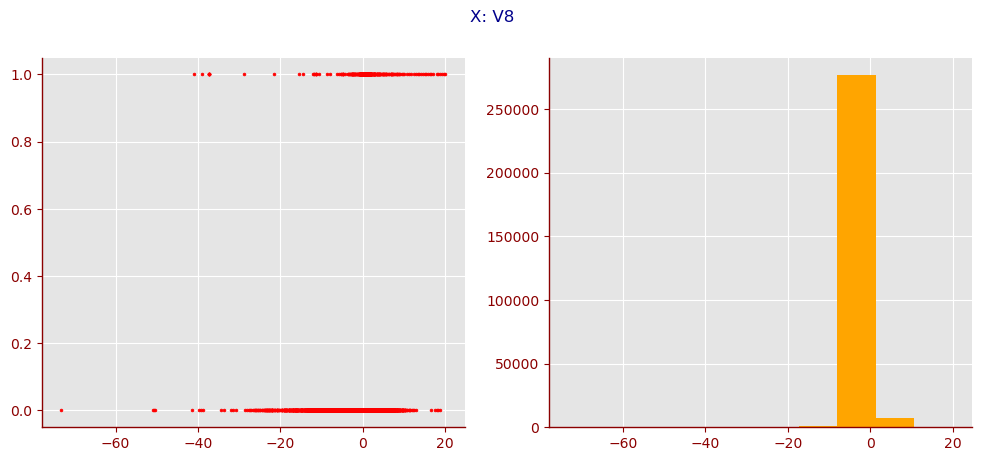

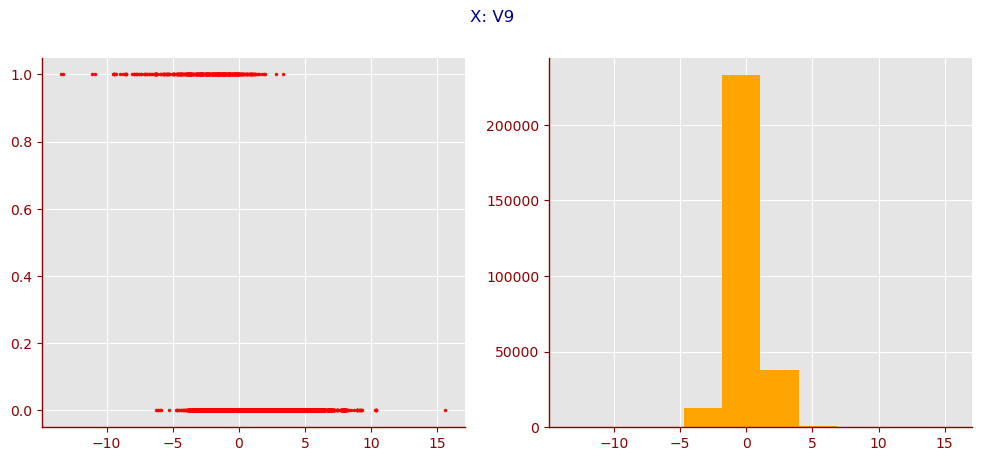

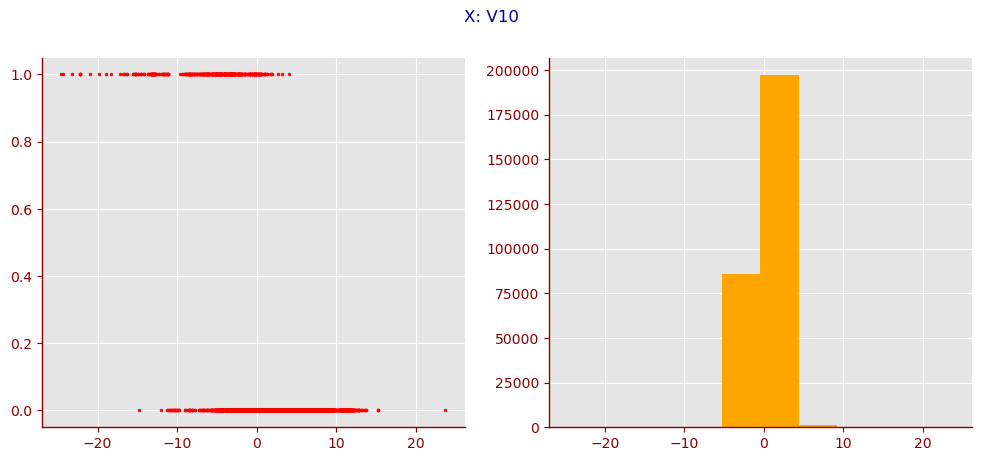

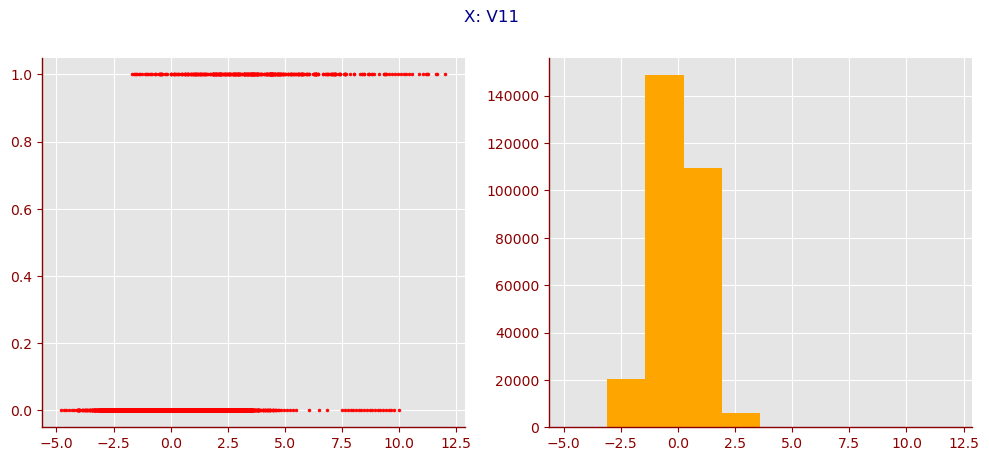

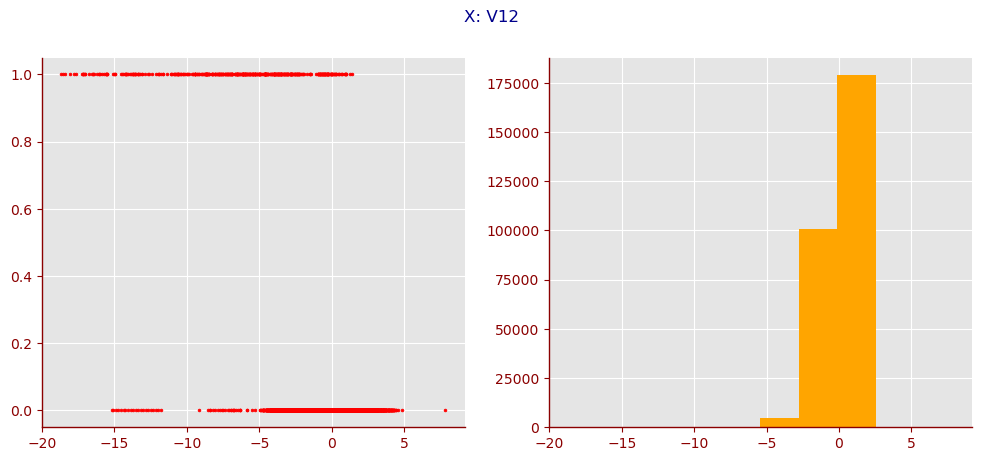

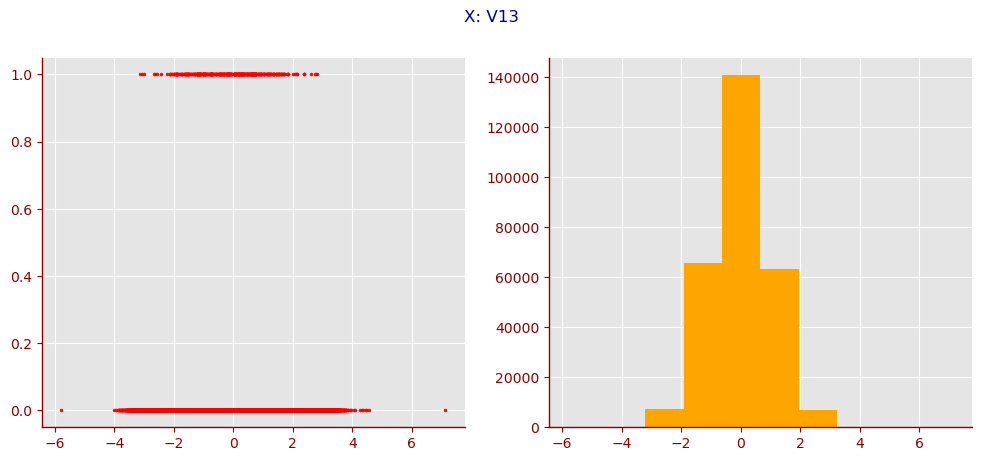

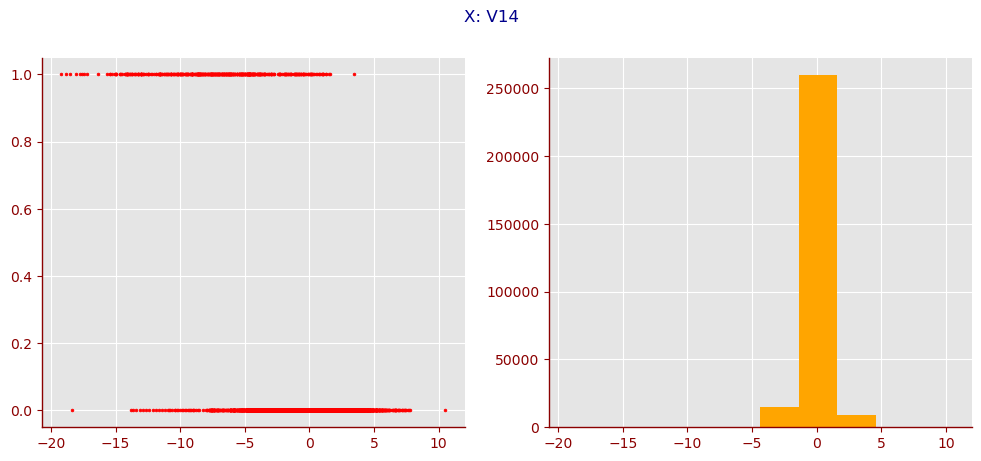

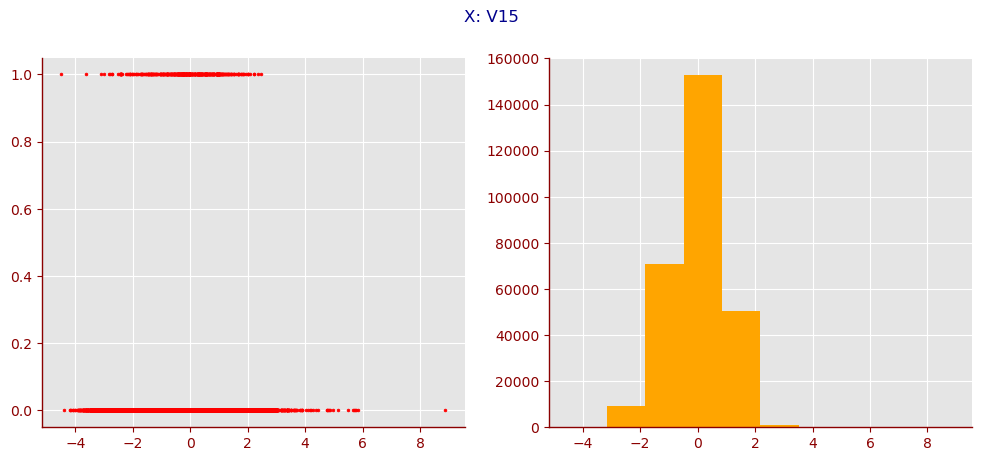

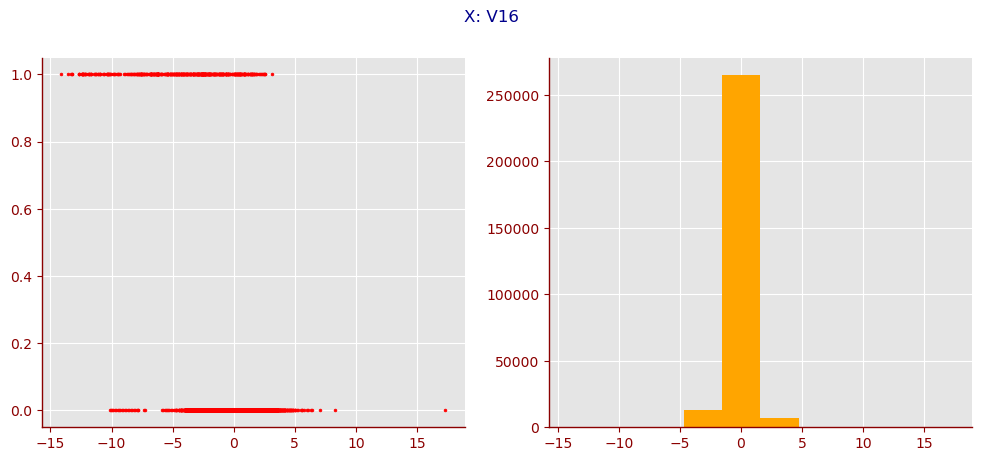

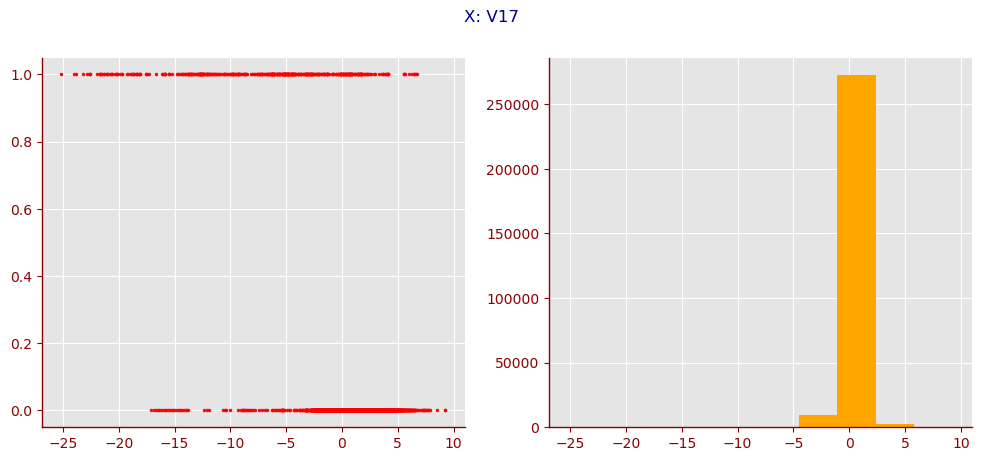

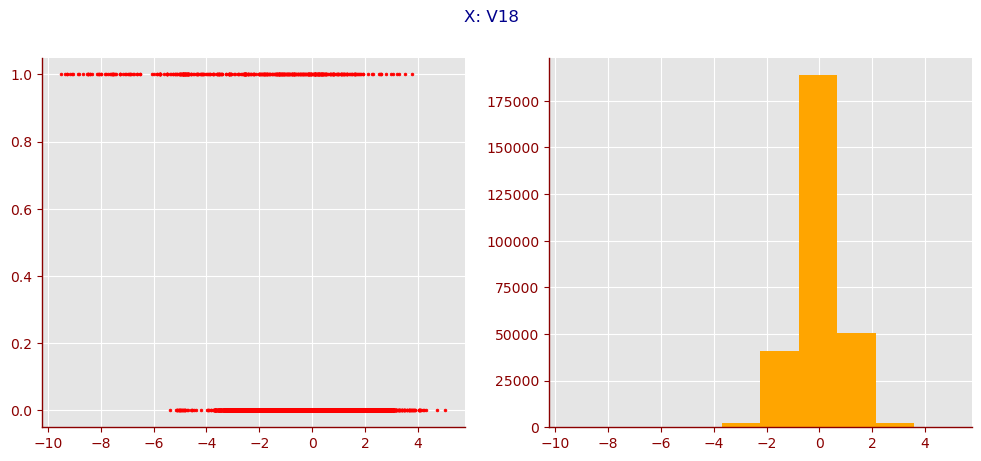

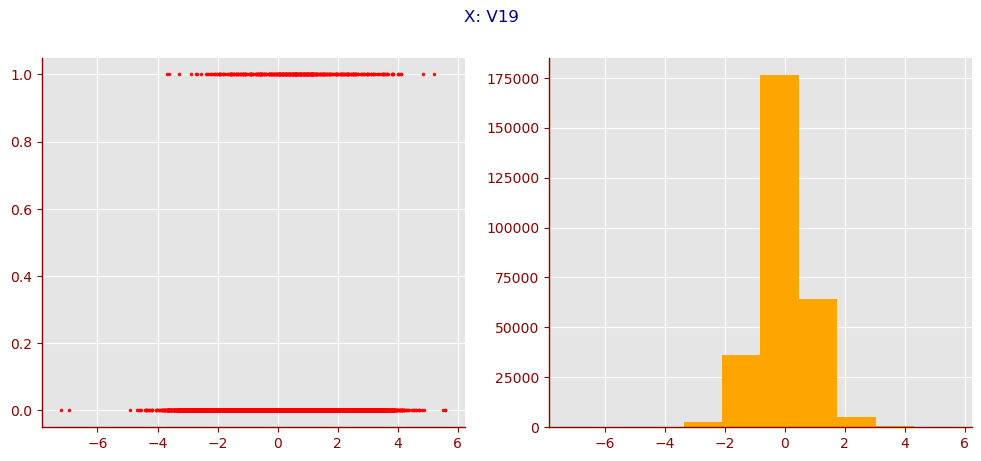

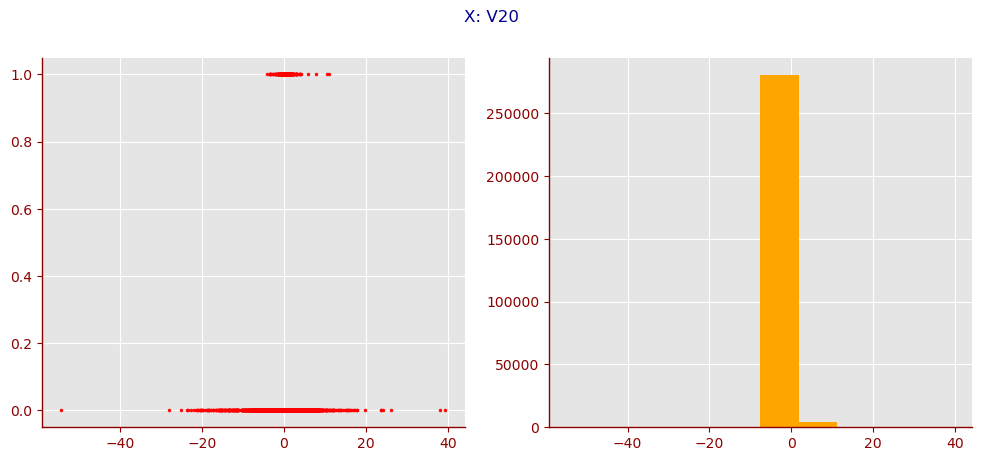

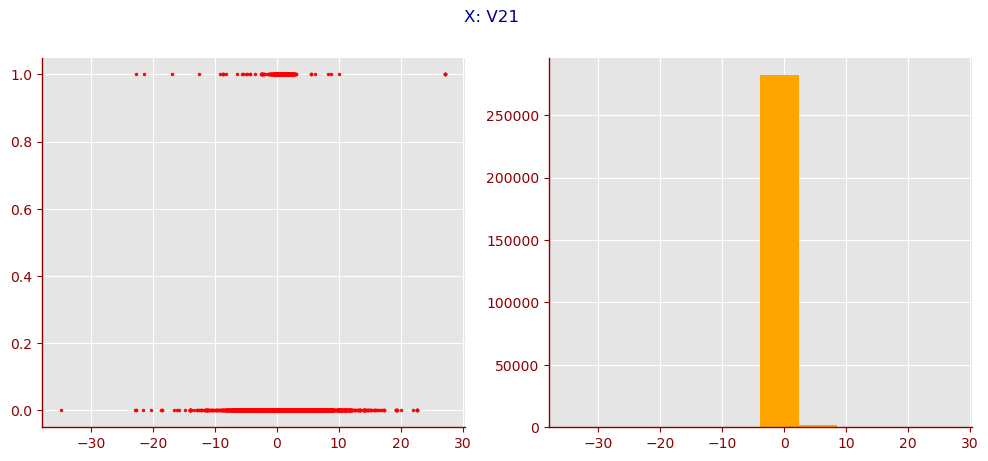

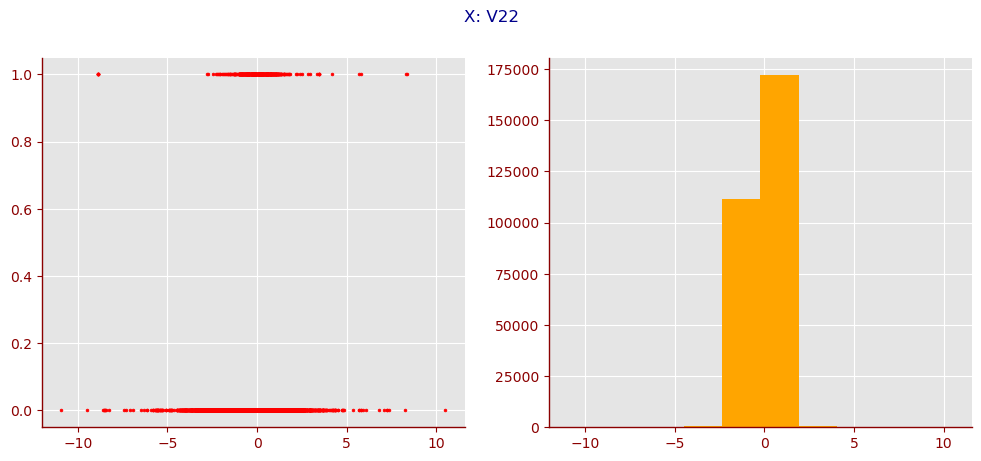

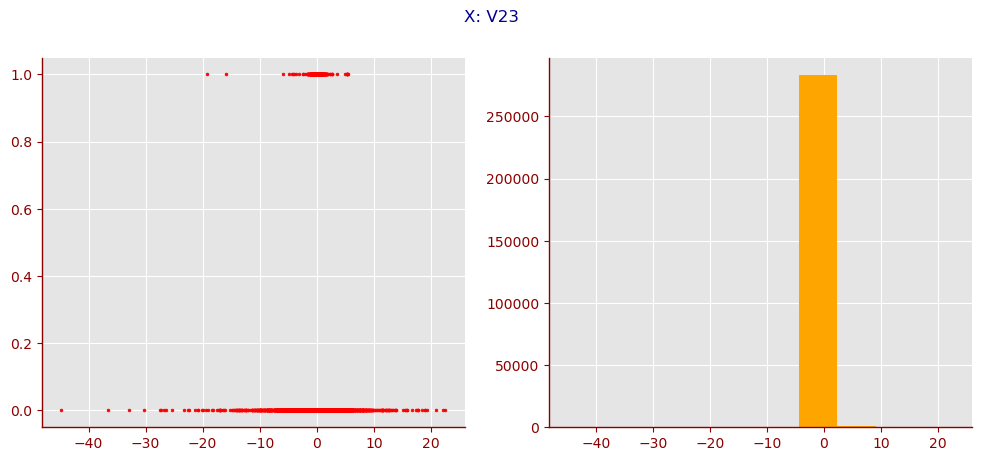

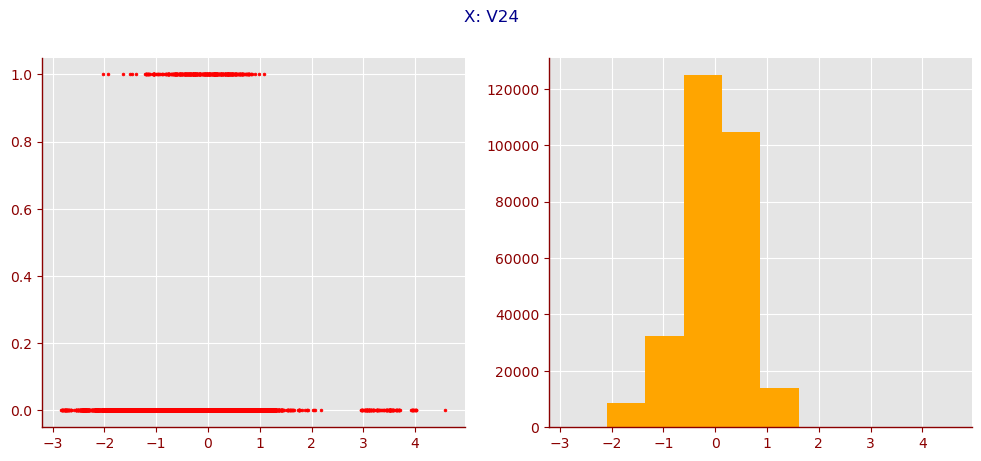

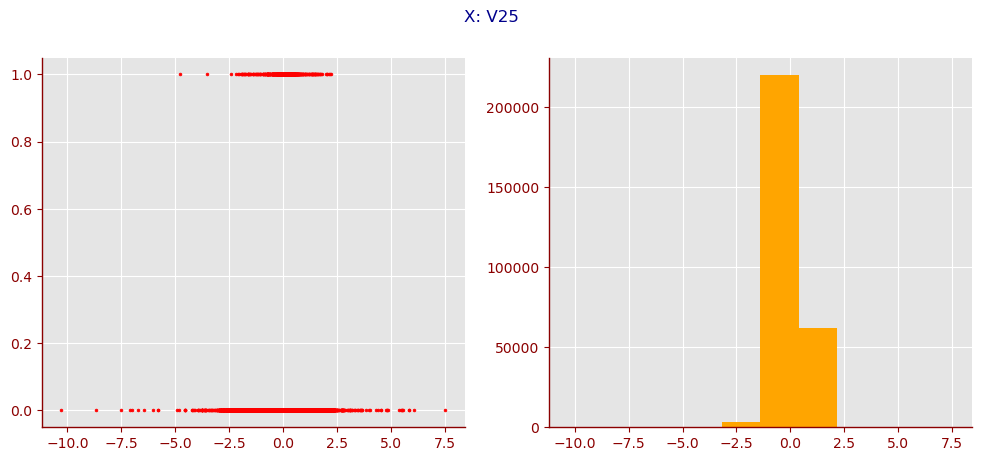

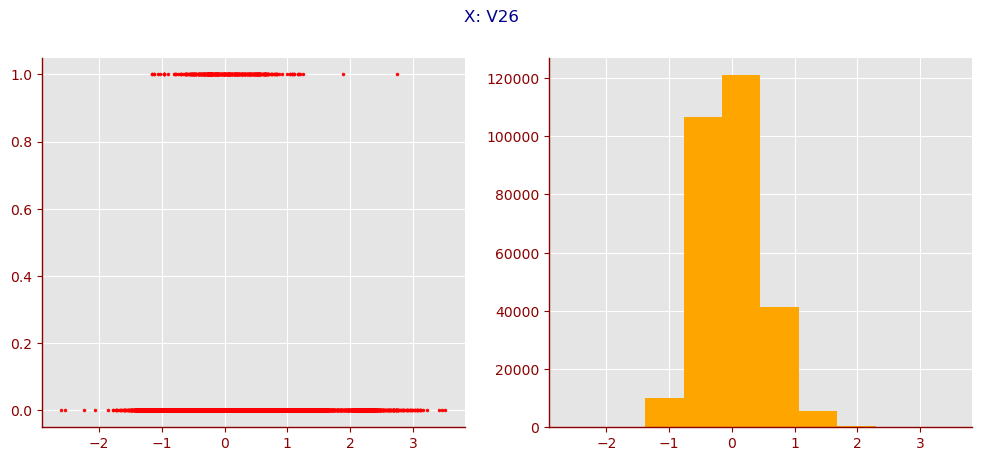

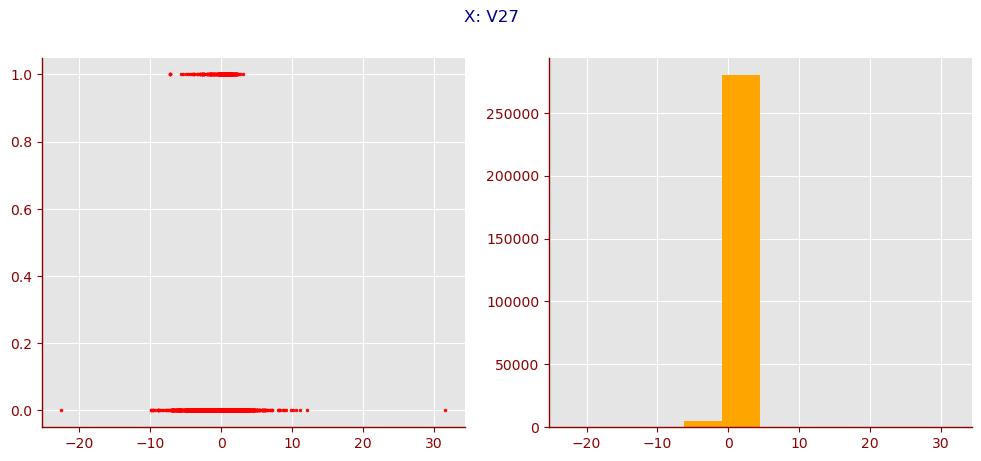

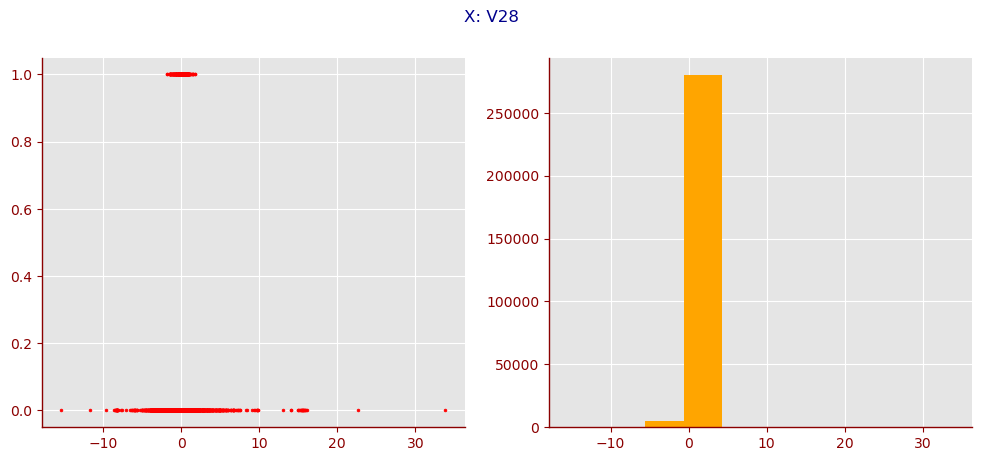

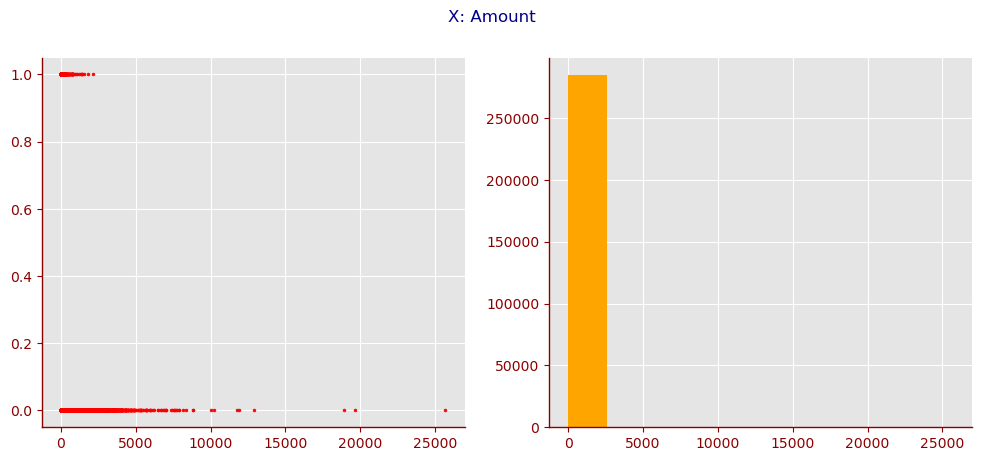

In [12]:
plot_features(X_df, y_df)

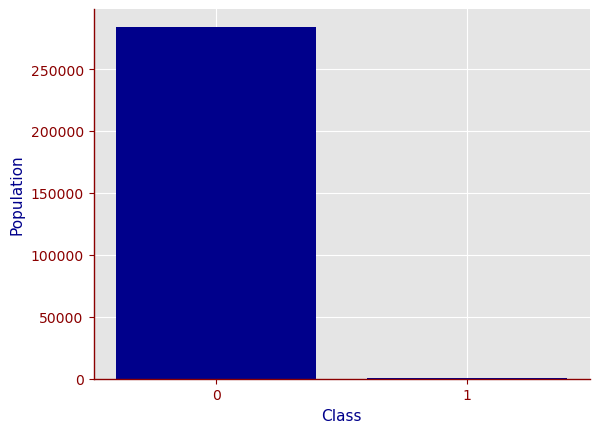

In [13]:
plot_class_dist(y_df)

In [14]:
def to_ts(data):
    return torch.as_tensor(data, dtype=torch.float32, device=device())

In [15]:
scaler = MinMaxScaler()  
X_ANN = scaler.fit_transform(X)
y_ANN = y.reshape(-1, 1)

In [16]:
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_ANN,
    y_ANN,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

X_train, X_test, y_train, y_test = to_ts(X_train_np), to_ts(X_test_np), to_ts(y_train_np), to_ts(y_test_np)

In [17]:
_, INPUT_SIZE = X_train.shape
_, OUTPUT_SIZE = y_train.shape

HIDDEN_SIZE1 = 30
HIDDEN_SIZE2 = 30
LR = 0.01
NO_EPOCHS = 30
BATCH_SIZE = 30
STEP = 1

In [18]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self._x = x
        self._y = y
        self._n_samples = len(self._x)

    def __getitem__(self, index):
        return self._x[index], self._y[index]

    def __len__(self):
        return self._n_samples


class ClassifierNN(torch.nn.Module):
    def __init__(self, input, hidden1, hidden2, output):
        super(ClassifierNN, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=input, out_features=hidden1)
        self.layer2 = torch.nn.Linear(in_features=hidden1, out_features=hidden2)
        self.layer3 = torch.nn.Linear(in_features=hidden2, out_features=output)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.activation(out)
        out = self.layer2(out)
        out = self.activation(out)
        out = self.layer3(out)
        return out

    def fit(
        self : torch.nn.Module,
        data_loader : torch.utils.data.DataLoader,
        optimizer : torch.optim.Optimizer,
        epochs : int=100,
        verbose : int=0,
        step : int=1,
    ) -> torch.nn.Module:
        if verbose:
            print("---START---")
        recall = 0.0
        loss = torch.nn.Module
        loss_fn = torch.nn.BCEWithLogitsLoss()
        ones = torch.ones(data_loader.batch_size, 1, device=device())
        zeros = torch.zeros(data_loader.batch_size, 1, device=device())
        accuracy = 0.0
        recall = 0.0
        precision = 0.0
        for epoch in range(epochs):
            accuracy = 0.0
            recall = 0.0
            precision = 0.0
            tn = 0.0
            fp = 0.0
            tp = 0.0
            fn = 0.0

            for _X, _y in data_loader:
                y_hat = self(_X)
                loss = loss_fn(y_hat, _y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                y_pred = torch.sigmoid(y_hat).round()
                ones = torch.ones(len(_y), 1, device=device())
                zeros = torch.zeros(len(_y), 1, device=device())
                tn += torch.bitwise_and((y_pred == zeros), (_y == zeros)).sum()
                fp += torch.bitwise_and((y_pred == ones), (_y == zeros)).sum()
                tp += torch.bitwise_and((y_pred == ones), (_y == ones)).sum()
                fn += torch.bitwise_and((y_pred == zeros), (_y == ones)).sum()

            accuracy = (tn + tp)/(tn + tp + fn + fp)
            precision = tp / (fp + tp)
            recall = tp / (fn + tp)
            
            if (epoch + 1) % step == 0 and verbose:
                print(f">>> Epoch: {epoch + 1}/{epochs}, Loss={loss.detach():.5f}, Accuracy={accuracy:5f}, Recall={recall:5f}, Precision={precision:5f}")
        if verbose:
            print(f"Completed, Loss={loss.detach():.5f}, Accuracy={accuracy:5f}, Recall={recall:5f}, Precision={precision:5f}")
            print("---END---")
        return self

    def predict_proba(self, x : torch.Tensor) -> torch.Tensor:
        y_proba_ones = torch.sigmoid(self(x))
        ones = torch.ones(len(y_proba_ones), 1).to(device())
        y_proba_zeros = ones - y_proba_ones
        return torch.cat((y_proba_zeros, y_proba_ones), 1)

    def predict(self, x : torch.Tensor) -> torch.Tensor:
        return torch.sigmoid(self(x)).round()

In [19]:
data_train = Dataset(
    x=X_train,
    y=y_train,
)

data_train_loader = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [20]:
model_ANN = ClassifierNN(
    input=INPUT_SIZE,
    hidden1=HIDDEN_SIZE1,
    hidden2=HIDDEN_SIZE2,
    output=OUTPUT_SIZE,
).to(device=device())

optimizer = torch.optim.SGD(
    model_ANN.parameters(),
    lr=LR,
    momentum=0.9,
)

model_ANN = model_ANN.fit(
    data_loader=data_train_loader,
    optimizer=optimizer,
    epochs=NO_EPOCHS,
    verbose=VERBOSE,
    step=STEP,
)

---START---
>>> Epoch: 1/30, Loss=0.00170, Accuracy=0.997393, Recall=0.000000, Precision=0.000000
>>> Epoch: 2/30, Loss=0.00128, Accuracy=0.998280, Recall=0.000000, Precision=  nan
>>> Epoch: 3/30, Loss=0.00028, Accuracy=0.998767, Recall=0.367347, Precision=0.813559
>>> Epoch: 4/30, Loss=0.00010, Accuracy=0.999236, Recall=0.676020, Precision=0.849359
>>> Epoch: 5/30, Loss=0.00003, Accuracy=0.999276, Recall=0.714286, Precision=0.840841
>>> Epoch: 6/30, Loss=0.00043, Accuracy=0.999320, Recall=0.739796, Precision=0.845481
>>> Epoch: 7/30, Loss=0.00147, Accuracy=0.999328, Recall=0.744898, Precision=0.846377
>>> Epoch: 8/30, Loss=0.00872, Accuracy=0.999350, Recall=0.765306, Precision=0.842697
>>> Epoch: 9/30, Loss=0.00030, Accuracy=0.999328, Recall=0.760204, Precision=0.834734
>>> Epoch: 10/30, Loss=0.00006, Accuracy=0.999333, Recall=0.752551, Precision=0.842857
>>> Epoch: 11/30, Loss=0.00013, Accuracy=0.999346, Recall=0.765306, Precision=0.840336
>>> Epoch: 12/30, Loss=0.00011, Accuracy=0.

In [21]:
y_proba = model_ANN.predict_proba(X_test)
y_pred = model_ANN.predict(X_test)
y_proba_np = y_proba.cpu().detach().numpy()
y_pred_np = y_pred.cpu().detach().numpy()

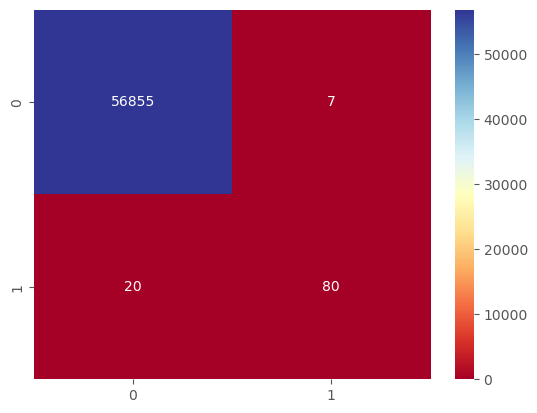

In [22]:
cm_ANN = metrics.confusion_matrix(y_true=y_test_np, y_pred=y_pred_np)
sns.heatmap(cm_ANN, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

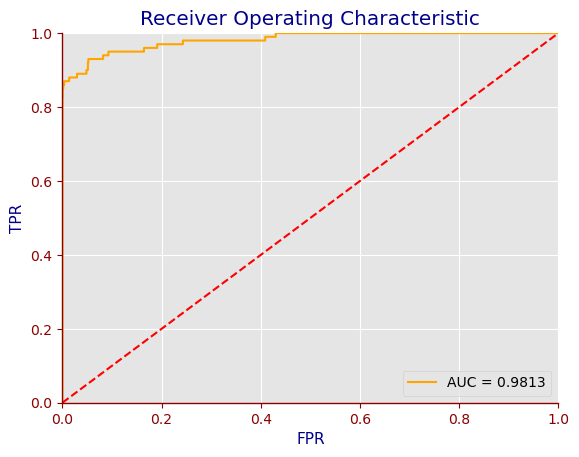

In [23]:
fpr_ANN, tpr_ANN, _ = metrics.roc_curve(y_test_np, y_proba_np[:, 1])
roc_auc_ANN = metrics.auc(fpr_ANN, tpr_ANN)
plot_roc(fpr_ANN, tpr_ANN, roc_auc_ANN)

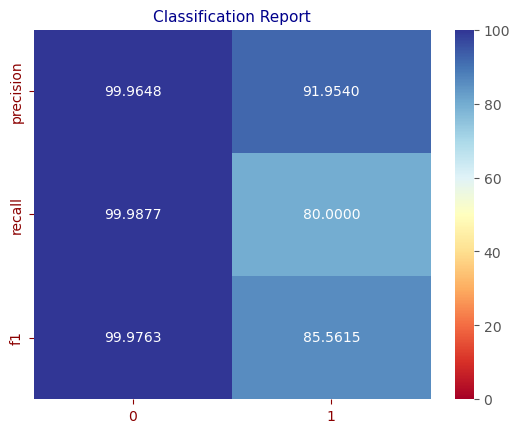

In [24]:
plot_classification(y_true=y_test_np, y_pred=y_pred_np)

In [25]:
metrics.accuracy_score(y_true=y_test_np, y_pred=y_pred_np)

0.9995259997893332